In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from compare_wandb import load_full_df, get_test_pdbs, load_run_dict

import wandb
api = wandb.Api()
entity = 'proteins'
project = 'iclr2021-rebuttal'

import boto3
import os
s3 = boto3.client("s3")
s3_bucket = "proteindata"

import torch

# load metatest pdbs
with open('metatest_fams.txt', 'r') as f:
    lines = f.readlines()
    metatest_pdbs = [l.strip() for l in lines]

from mogwai import models
from mogwai.utils.functional import apc
model_name = 'factored_attention'
fatt_model = models.get(model_name)
gremlin_model = models.get('gremlin')

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from scipy.stats import spearmanr
from scipy.stats import pearsonr

import pickle as pkl


In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 8,
})


In [23]:
head_sweep_runs = {
    'fatt-head-size-metatest-sweep-512': '6m7kg37h',
    'fatt-head-size-metatest-sweep-8-256': 'typzrhvk',
    'fatt-metatest-head-sweep-8': '8yi6a4w5',
}

dict_of_dfs = load_run_dict(head_sweep_runs)
fatt_df = pd.concat(list(dict_of_dfs.values()))
fatt_df = fatt_df[fatt_df['num_attention_heads'] == 8]

100%|██████████| 3811/3811 [00:00<00:00, 38708.06it/s]

6m7kg37h has 748 runs
typzrhvk has 3811 runs



  0%|          | 0/2233 [00:00<?, ?it/s]

8yi6a4w5 has 2233 runs


100%|██████████| 2233/2233 [00:03<00:00, 568.43it/s]


In [25]:
print(fatt_df.shape)
fatt_df.head()

(5306, 18)


,sweep_name,model,pdb,msa_length,pdb_idx,num_seqs,run_state,pr_at_L,pr_at_L_apc,pr_at_L_5,pr_at_L_5_apc,auc,auc_apc,use_bias,run_id,attention_head_size,num_attention_heads,log_num_seqs
0,fatt-head-size-metatest-sweep-512,factored_attention,2w3o_1_A,100.0,747,17351.0,finished,0.500000,0.520000,0.800000,0.850000,0.810691,0.825751,True,ucwprqtz,512,8,9.761405
1,fatt-head-size-metatest-sweep-512,factored_attention,1eqz_1_B,108.0,746,4997.0,finished,0.055556,0.046296,0.095238,0.095238,0.110094,0.115649,True,f11aj8g9,512,8,8.516593
2,fatt-head-size-metatest-sweep-512,factored_attention,3no0_1_A,276.0,745,9408.0,finished,0.326087,0.358696,0.690909,0.781818,0.684497,0.730325,True,bt4dy9jb,512,8,9.149316
3,fatt-head-size-metatest-sweep-512,factored_attention,1xju_1_A,156.0,744,2110.0,finished,0.333333,0.358974,0.483871,0.516129,0.485164,0.488141,True,vve3h416,512,8,7.654443
4,fatt-head-size-metatest-sweep-512,factored_attention,4ew5_1_B,97.0,743,2254.0,finished,0.134021,0.154639,0.315789,0.263158,0.304345,0.291075,True,llg96jsj,512,8,7.720462


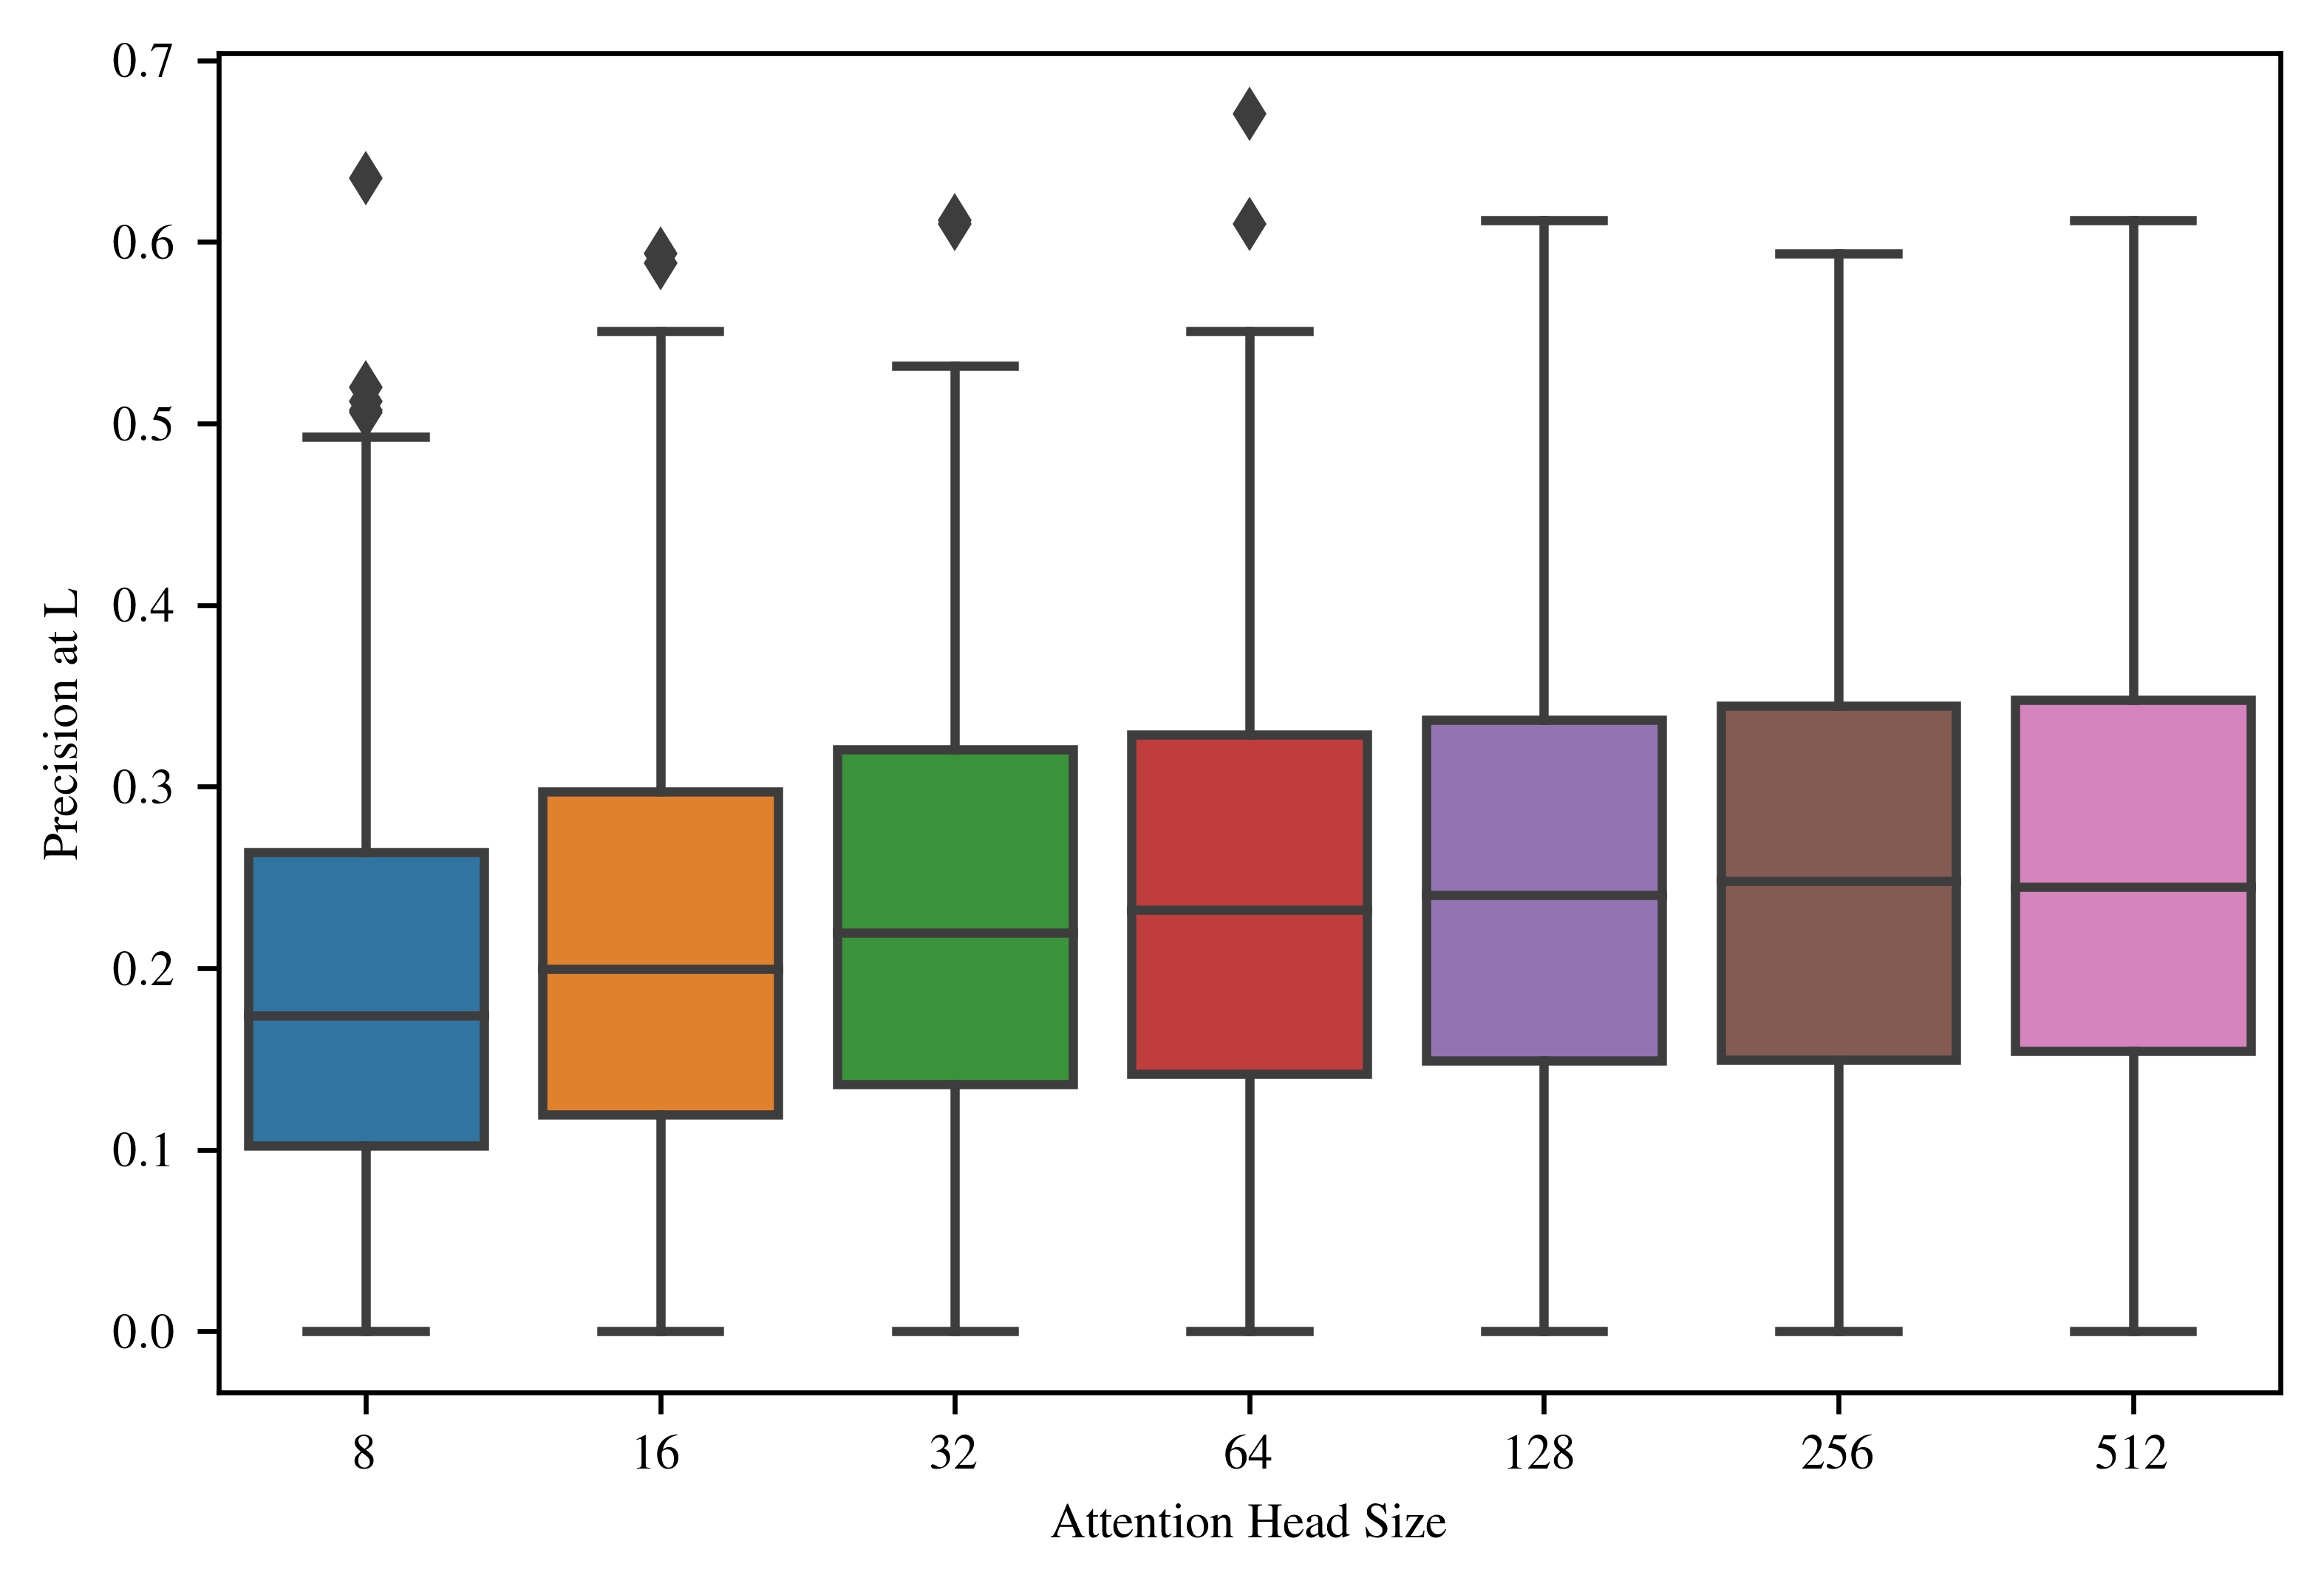

In [26]:
plt.subplots(dpi=600)
sns.boxplot(x="attention_head_size", 
               y="pr_at_L_apc", 
               data=fatt_df)
plt.xlabel('Attention Head Size')
plt.ylabel('Precision at L')
# plt.title('Effect of Head Size on Pr')

plt.savefig('head_size_sweep_p_at_l.pdf', dpi=600, bbox_inches="tight")

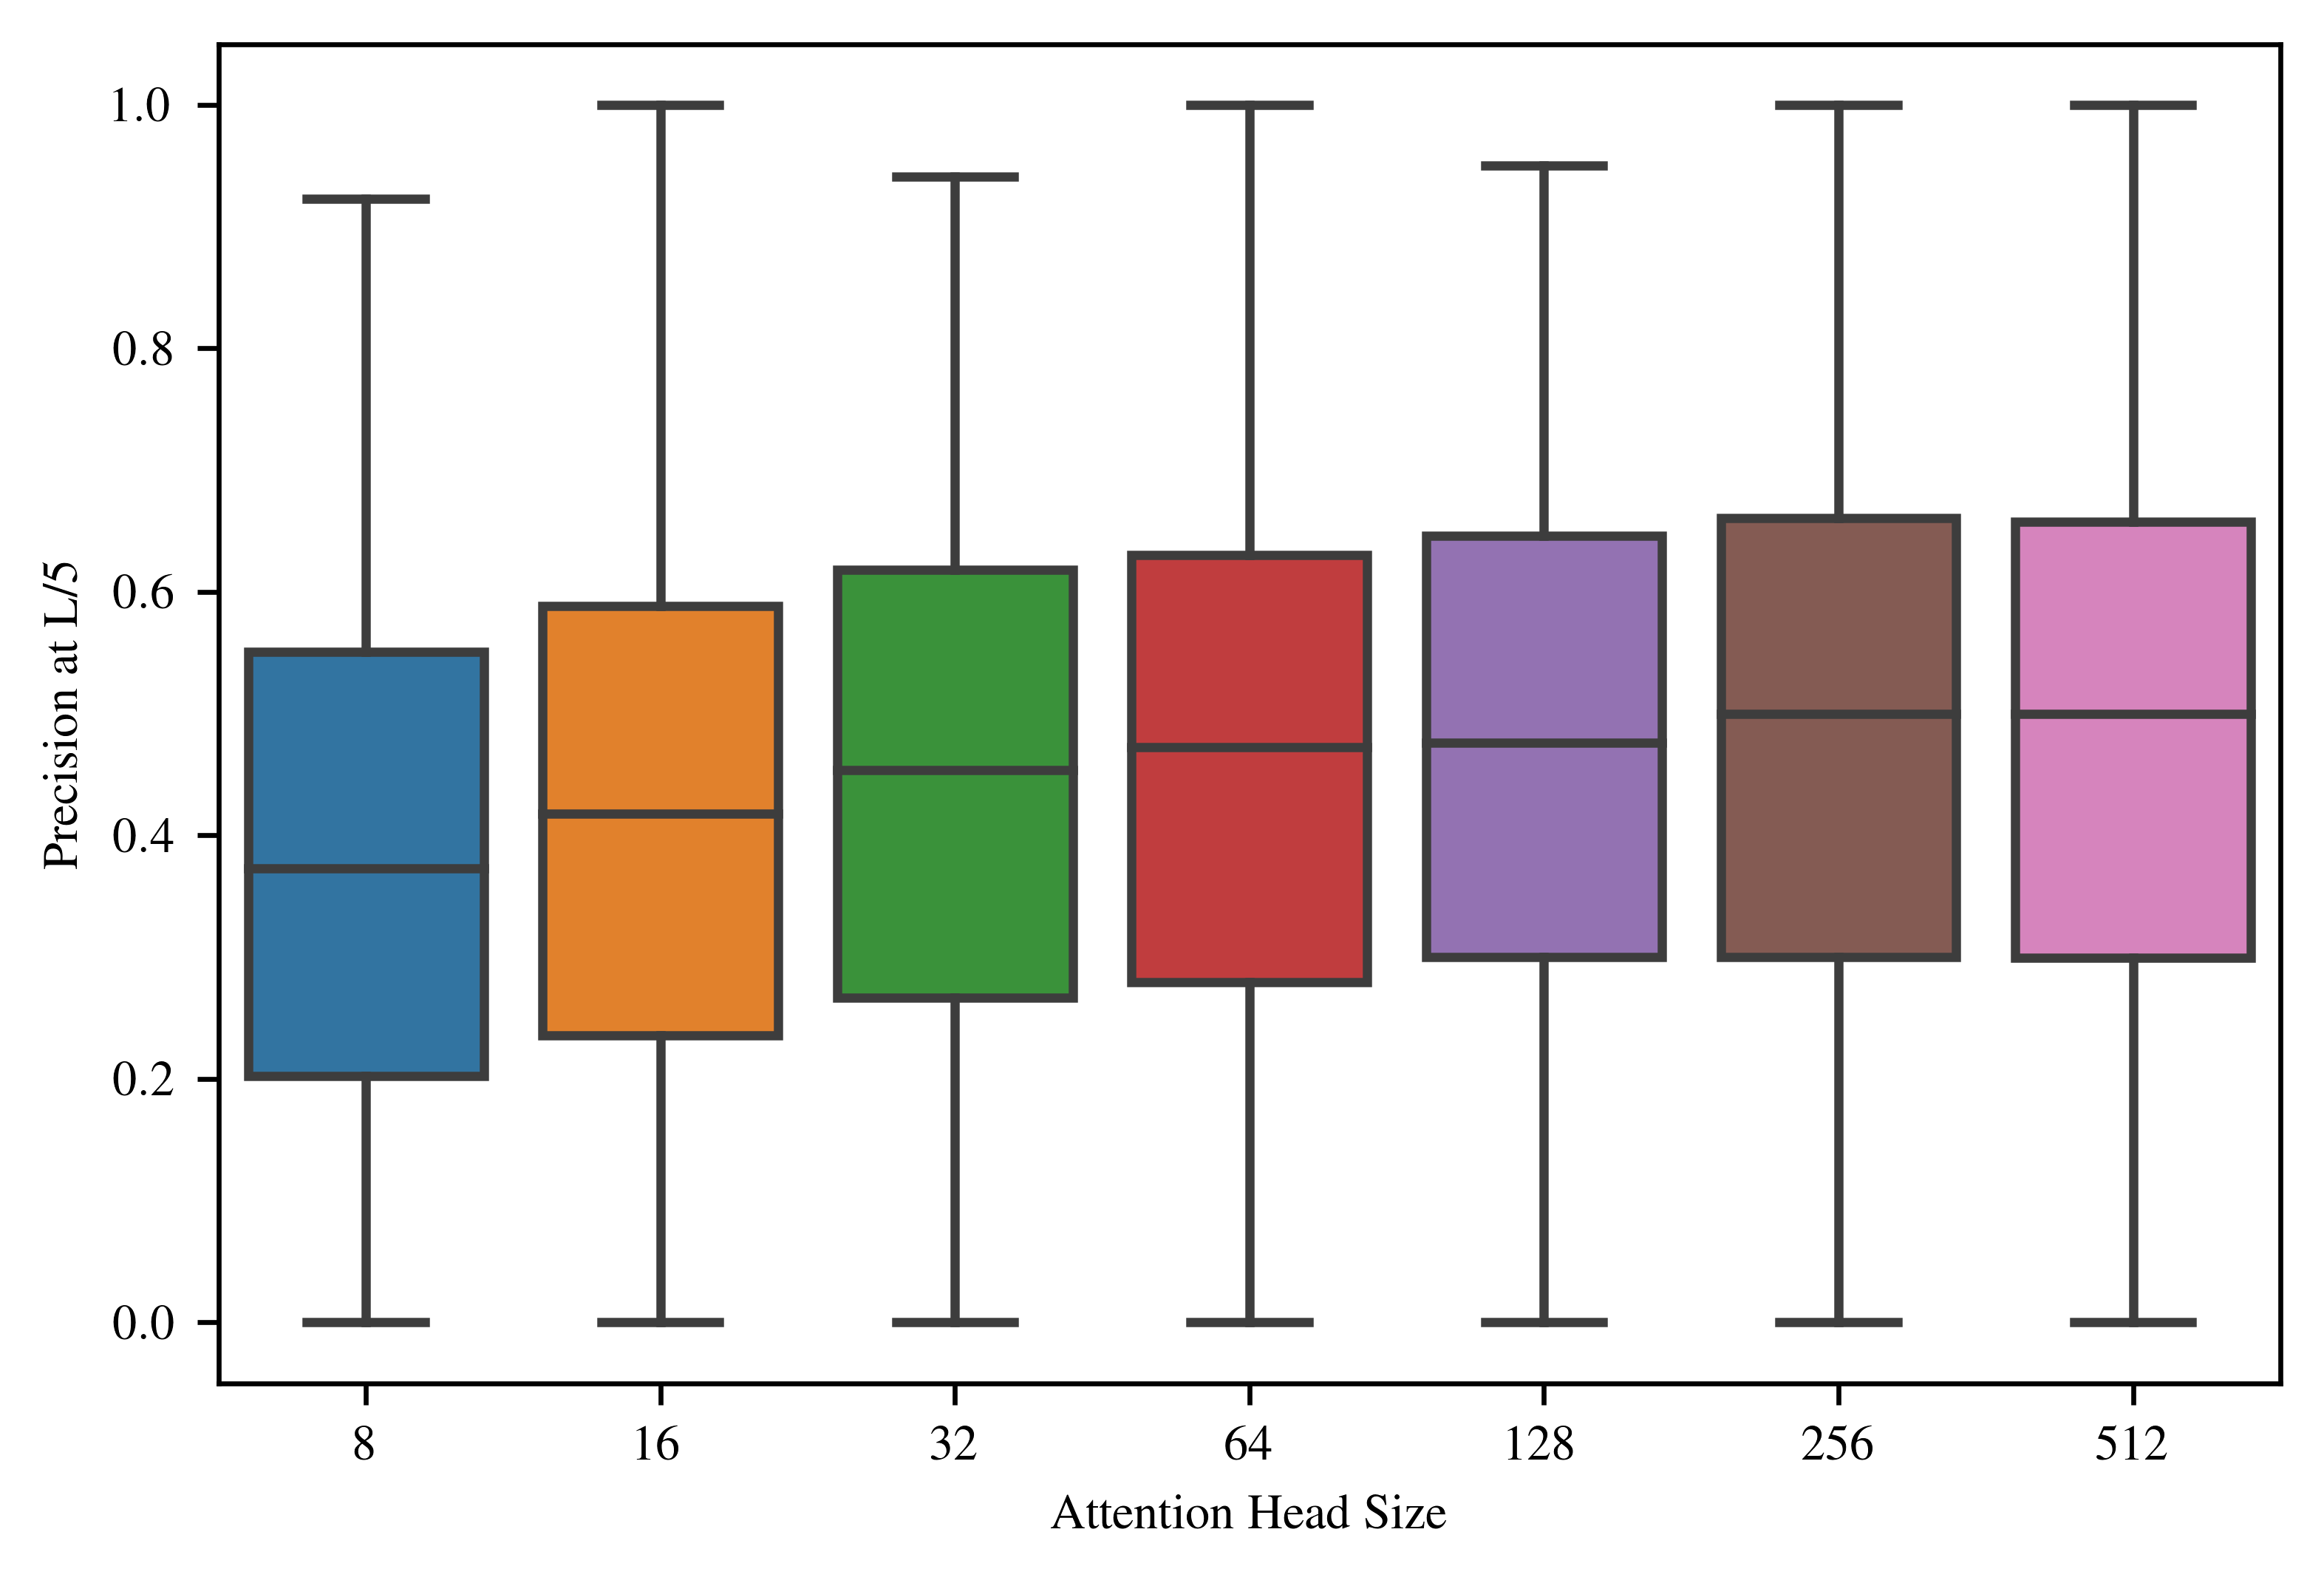

In [28]:
plt.subplots(dpi=600)
sns.boxplot(x="attention_head_size", 
               y="pr_at_L_5_apc", 
               data=fatt_df)
plt.xlabel('Attention Head Size')
plt.ylabel('Precision at L/5')
# plt.title('Effect of Head Size on Precision @ L/5')

plt.savefig('head_size_sweep_p_at_l_5.pdf', dpi=600, bbox_inches="tight")